Experiments with the emulator

In [1]:
import Starfish

In [2]:
from Starfish.grid_tools import HDF5Interface

In [3]:
from Starfish.emulator import PCAGrid

In [4]:
# Load the HDF5 interface using the values in config.yaml
myHDF5 = HDF5Interface()

In [6]:
interface = myHDF5

In [5]:
pca = PCAGrid.create(myHDF5)

found 7 components explaining 99.9% of the variance
Shape of PCA components (7, 2048)


In [7]:
wl = interface.wl
dv = interface.dv

In [8]:
wl

array([ 20400.        ,  20401.94650153,  20403.89318879, ...,
        24795.26800689,  24797.63389058,  24800.        ])

In [9]:
npix = len(wl)
# number of spectra in the synthetic library
M = len(interface.grid_points)

In [10]:
M

90

In [11]:
fluxes = np.empty((M, npix))

In [12]:
z = 0
for i, spec in enumerate(interface.fluxes):
    fluxes[z,:] = spec
    z += 1

In [14]:
fluxes.shape

(90, 2048)

In [15]:
# Normalize all of the fluxes to an average value of 1
# In order to remove uninteresting correlations

flux_abs = np.average(fluxes, axis=1)[np.newaxis].T

In [17]:
flux_abs.shape

(90, 1)

In [52]:
pca.gparams.shape

(90, 3)

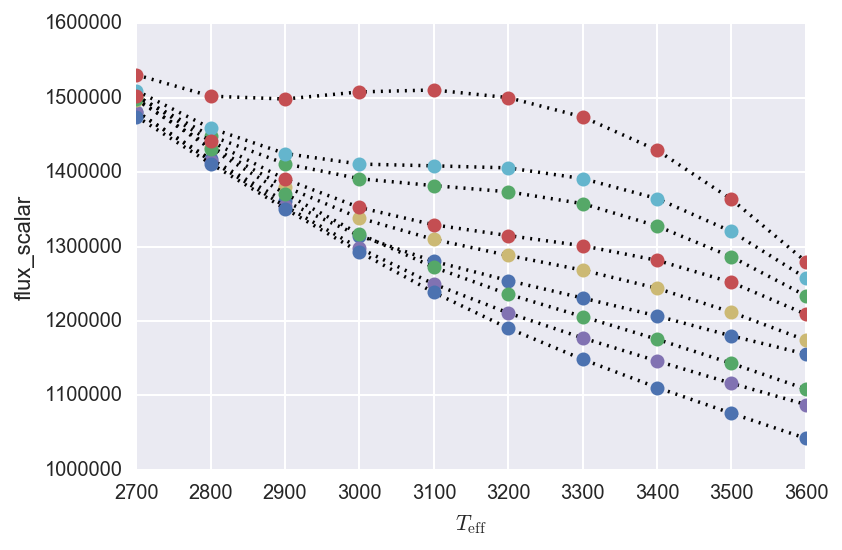

In [50]:
for i in range(9):
    plt.plot(interface.grid_points[i::9, 0], flux_abs[i::9,0], 'k:')
    plt.plot(interface.grid_points[i::9, 0], flux_abs[i::9,0], 'o')    
    plt.ylabel('flux_scalar')
    plt.xlabel('$T_{\mathrm{eff}}$')

In [38]:
interface.grid_points[::9,0]

array([ 2700.,  2800.,  2900.,  3000.,  3100.,  3200.,  3300.,  3400.,
        3500.,  3600.])

In [37]:
interface.grid_points

array([[  2.70000000e+03,   3.00000000e+00,  -5.00000000e-01],
       [  2.70000000e+03,   3.00000000e+00,   0.00000000e+00],
       [  2.70000000e+03,   3.00000000e+00,   5.00000000e-01],
       [  2.70000000e+03,   3.50000000e+00,  -5.00000000e-01],
       [  2.70000000e+03,   3.50000000e+00,   0.00000000e+00],
       [  2.70000000e+03,   3.50000000e+00,   5.00000000e-01],
       [  2.70000000e+03,   4.00000000e+00,  -5.00000000e-01],
       [  2.70000000e+03,   4.00000000e+00,   0.00000000e+00],
       [  2.70000000e+03,   4.00000000e+00,   5.00000000e-01],
       [  2.80000000e+03,   3.00000000e+00,  -5.00000000e-01],
       [  2.80000000e+03,   3.00000000e+00,   0.00000000e+00],
       [  2.80000000e+03,   3.00000000e+00,   5.00000000e-01],
       [  2.80000000e+03,   3.50000000e+00,  -5.00000000e-01],
       [  2.80000000e+03,   3.50000000e+00,   0.00000000e+00],
       [  2.80000000e+03,   3.50000000e+00,   5.00000000e-01],
       [  2.80000000e+03,   4.00000000e+00,  -5.0000000

In [ ]:
fluxes = fluxes/flux_abs

# Subtract the mean from all of the fluxes.
flux_mean = np.average(fluxes, axis=0)
fluxes -= flux_mean

# "Whiten" each spectrum such that the variance for each wavelength is 1
flux_std = np.std(fluxes, axis=0)
fluxes /= flux_std

# Use the scikit-learn PCA module
# Automatically select enough components to explain > threshold (say
# 0.99, or 99%) of the variance.
pca = PCA(n_components=Starfish.PCA["threshold"])
pca.fit(fluxes)
comp = pca.transform(fluxes)
components = pca.components_
mean = pca.mean_
variance_ratio = pca.explained_variance_ratio_

ncomp = len(components)

print("found {} components explaining {}% of the" \
      " variance".format(ncomp, 100* Starfish.PCA["threshold"]))

print("Shape of PCA components {}".format(components.shape))